 <img src='logo_Codsoft.jpg' align='left'>
 <h1> CodSoft : Data Science Internship Tasks </h1>

<h2> Task 5 : Credit Card Fraud Detection </h2>
<h4> Target : Identify fraudulent credit card transactions</h4>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing train_test_split to split the data to features and target
from sklearn.model_selection import train_test_split

# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importing classification report (precision ,recall , f1_score)
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

In [3]:
# Reading Dataset
credit_card=pd.read_csv('creditcard.csv')

In [4]:
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Columns name
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# number of rows and columns of dataset
credit_card.shape

(284807, 31)

In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_card[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [9]:
# check null values
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Number of Fraudulent transactions and Non-Fraudulent transactions
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

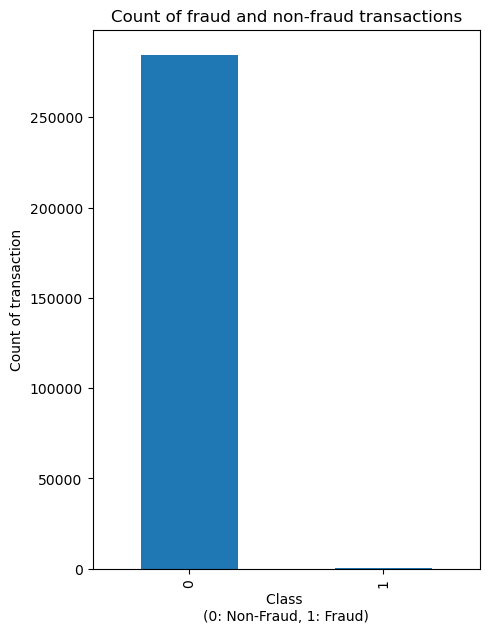

In [11]:
plt.figure(figsize=(5,7))
credit_card['Class'].value_counts().plot(kind='bar')
plt.ylabel('Count of transaction')
plt.xlabel('Class \n(0: Non-Fraud, 1: Fraud)')
plt.title('Count of fraud and non-fraud transactions')
plt.show()

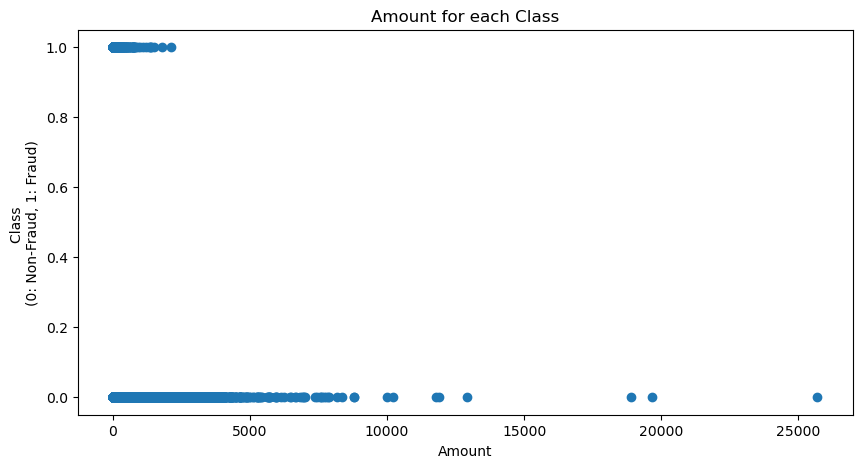

In [12]:
# figuring out the amount in fraud cases and Non-fraud
plt.figure(figsize=(10,5))
plt.scatter(credit_card.Amount,credit_card.Class)
plt.xlabel('Amount')
plt.ylabel('Class \n(0: Non-Fraud, 1: Fraud)')
plt.title('Amount for each Class')
plt.show()

In [13]:
# split the data to fraud and non-fraud transiction to balance the data
fraud = credit_card.loc[credit_card.Class==1]
non_fraud = credit_card.loc[credit_card.Class==0]
print(f'Non_Fraud data Shape: {non_fraud.shape}')
print(f'Fraud data Shape:     {fraud.shape}')

Non_Fraud data Shape: (284315, 31)
Fraud data Shape:     (492, 31)


In [14]:
# Take a sample of non-fraud transaction equal to fraud transaction
non_fraud=non_fraud.sample(n=fraud.shape[0])

In [15]:
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144795,86404.0,1.883202,-0.270087,-0.527258,1.474045,-0.141491,0.209608,-0.278594,0.096644,1.200436,...,-0.515961,-1.298775,0.439511,0.512816,-0.316595,-1.131044,0.045479,-0.019901,39.40,0
39555,39881.0,-0.318636,0.975104,1.050598,-0.065056,0.668431,-0.285965,0.744827,-0.057484,-0.318685,...,-0.051202,-0.145131,0.217971,-0.312159,-1.202754,-1.016450,0.127460,0.257046,2.00,0
98858,66848.0,-1.660827,-1.914993,1.522965,-1.219665,-0.022710,-0.883144,-0.637605,0.097202,-0.578488,...,0.562970,1.529584,0.676958,0.099132,-0.574319,-0.281235,0.105987,0.316376,129.00,0
67903,52745.0,-4.415803,3.533637,-0.221846,-2.231455,-1.061425,-0.570744,-0.046594,0.862339,2.620274,...,-0.501358,-0.280368,0.143121,-0.038473,0.207357,0.691260,0.693784,-0.067204,1.69,0
128488,78729.0,-0.380754,1.090893,1.412725,0.148331,-0.179716,-1.166857,0.724514,-0.078670,-0.372631,...,-0.240694,-0.655828,0.049808,0.650697,-0.211215,0.052451,0.240940,0.101605,11.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68946,53201.0,1.353470,-0.547460,0.175781,-0.578207,-0.951876,-0.900728,-0.406315,-0.125975,-0.932698,...,0.212275,0.582023,-0.149867,0.582501,0.706743,-0.094150,-0.018557,-0.004263,18.00,0
40932,40467.0,0.502820,-0.452123,-0.304333,2.791905,-0.174261,-0.711887,1.061192,-0.377162,-1.087504,...,0.211758,-0.267741,-0.435855,0.395983,0.589749,0.029207,-0.111240,0.075313,379.18,0
52943,45727.0,-1.481488,1.059947,1.017582,0.717634,0.254558,-0.295444,0.505352,0.034559,-0.740055,...,0.159946,0.395815,-0.513334,0.046148,0.145309,-0.326450,-0.662466,-0.206277,30.00,0
258834,158846.0,2.061924,-0.176166,-0.692063,0.155137,0.054938,0.128976,-0.421587,-0.037987,1.071269,...,-0.220636,-0.421360,0.302546,0.030421,-0.251665,-0.616724,0.041275,-0.028902,0.12,0


In [16]:
# Concat fraud and non-fraud sample
new_creditcard=pd.concat([fraud,non_fraud],ignore_index=True)

In [17]:
new_creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,53201.0,1.353470,-0.547460,0.175781,-0.578207,-0.951876,-0.900728,-0.406315,-0.125975,-0.932698,...,0.212275,0.582023,-0.149867,0.582501,0.706743,-0.094150,-0.018557,-0.004263,18.00,0
980,40467.0,0.502820,-0.452123,-0.304333,2.791905,-0.174261,-0.711887,1.061192,-0.377162,-1.087504,...,0.211758,-0.267741,-0.435855,0.395983,0.589749,0.029207,-0.111240,0.075313,379.18,0
981,45727.0,-1.481488,1.059947,1.017582,0.717634,0.254558,-0.295444,0.505352,0.034559,-0.740055,...,0.159946,0.395815,-0.513334,0.046148,0.145309,-0.326450,-0.662466,-0.206277,30.00,0
982,158846.0,2.061924,-0.176166,-0.692063,0.155137,0.054938,0.128976,-0.421587,-0.037987,1.071269,...,-0.220636,-0.421360,0.302546,0.030421,-0.251665,-0.616724,0.041275,-0.028902,0.12,0


In [18]:
new_creditcard.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [19]:
# Identify features and target
features=new_creditcard.drop(['Class'],axis=1)
target=new_creditcard['Class']

In [20]:
features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,53201.0,1.353470,-0.547460,0.175781,-0.578207,-0.951876,-0.900728,-0.406315,-0.125975,-0.932698,...,0.023000,0.212275,0.582023,-0.149867,0.582501,0.706743,-0.094150,-0.018557,-0.004263,18.00
980,40467.0,0.502820,-0.452123,-0.304333,2.791905,-0.174261,-0.711887,1.061192,-0.377162,-1.087504,...,0.595145,0.211758,-0.267741,-0.435855,0.395983,0.589749,0.029207,-0.111240,0.075313,379.18
981,45727.0,-1.481488,1.059947,1.017582,0.717634,0.254558,-0.295444,0.505352,0.034559,-0.740055,...,-0.161003,0.159946,0.395815,-0.513334,0.046148,0.145309,-0.326450,-0.662466,-0.206277,30.00
982,158846.0,2.061924,-0.176166,-0.692063,0.155137,0.054938,0.128976,-0.421587,-0.037987,1.071269,...,-0.082361,-0.220636,-0.421360,0.302546,0.030421,-0.251665,-0.616724,0.041275,-0.028902,0.12


In [21]:
target

0      1
1      1
2      1
3      1
4      1
      ..
979    0
980    0
981    0
982    0
983    0
Name: Class, Length: 984, dtype: int64

In [22]:
# split the data to training and testing
features_train,features_test,target_train,target_test=train_test_split(features,target,train_size=0.8,random_state=2)

In [23]:
features_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
601,64310.0,0.216671,-2.378674,-0.467878,-0.098959,-1.382193,-0.207425,0.300026,-0.130559,-1.034000,...,0.572818,-0.023469,-0.776744,-0.450756,0.280404,0.072277,1.034061,-0.166848,0.082929,569.97
365,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22
412,143434.0,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,...,0.164288,0.727415,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,1.00
226,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
397,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,169325.0,-0.060499,0.936161,-0.852150,-1.475470,1.763543,-0.685335,1.825381,-0.554850,0.067299,...,0.142605,0.116868,0.830030,-0.330337,0.229256,-0.327532,0.020598,0.157052,-0.126010,0.76
584,82894.0,1.192194,-0.461654,0.015102,0.317217,1.297562,4.413773,-1.448439,1.219523,1.223291,...,-0.039373,-0.064347,0.037221,-0.098880,1.028882,0.653527,-0.268470,0.098718,0.031334,1.06
493,39881.0,-0.318636,0.975104,1.050598,-0.065056,0.668431,-0.285965,0.744827,-0.057484,-0.318685,...,-0.177158,-0.051202,-0.145131,0.217971,-0.312159,-1.202754,-1.016450,0.127460,0.257046,2.00
527,116931.0,-0.168683,0.582628,0.550597,-0.966726,0.564338,-0.313693,0.873827,-0.004357,-0.204909,...,-0.161884,0.157333,0.487755,0.015373,-0.375122,-0.926776,-0.028704,0.176586,0.216685,30.90


In [24]:
features_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
288,91502.0,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,...,-0.006388,-0.563944,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.00
540,162367.0,2.049927,0.129432,-1.768558,0.244648,0.614740,-0.419455,0.099924,-0.094303,0.197884,...,-0.117350,-0.324329,-0.845136,0.296139,0.265702,-0.246191,0.167118,-0.064402,-0.042331,0.89
806,155252.0,1.872518,-0.093371,-1.730990,0.490946,0.087276,-1.154886,0.206632,-0.213036,0.403809,...,-0.107926,0.291787,0.811241,-0.066568,-0.058225,0.153261,-0.126078,-0.019049,-0.030824,69.00
273,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00
653,121437.0,1.811008,-0.237167,-0.196471,1.287319,-0.489320,-0.210965,-0.369591,0.071108,0.547975,...,-0.152496,-0.123586,-0.353863,0.351744,-0.053724,-0.449520,-1.005903,0.046167,-0.026694,50.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,129749.0,-1.936504,0.435612,-1.224222,-2.957188,2.587664,0.153324,1.082382,0.545297,-0.721456,...,-0.294604,0.323507,0.879903,-1.023085,-0.803513,1.444679,1.099315,0.000615,-0.238673,15.74
345,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,...,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59
559,143138.0,-0.100226,0.654743,0.087549,-0.249101,0.747274,-0.309196,0.728941,0.058566,0.598702,...,-0.182464,-0.328871,-0.701658,0.078716,0.561749,-0.871132,0.115217,0.179840,0.243413,9.43
640,149095.0,-1.366166,0.290494,1.727025,-0.510530,-0.197643,0.754729,-0.261367,0.816050,-0.117758,...,0.244868,0.225993,0.298906,-0.155808,0.354106,0.451271,-0.238219,-0.053052,-0.037890,86.06


In [25]:
target_train

601    0
365    1
412    1
226    1
397    1
      ..
534    0
584    0
493    0
527    0
168    1
Name: Class, Length: 787, dtype: int64

In [26]:
target_test

288    1
540    0
806    0
273    1
653    0
      ..
953    0
345    1
559    0
640    0
175    1
Name: Class, Length: 197, dtype: int64

In [27]:
# Identifying models
models=[LogisticRegression(),RandomForestClassifier()]

# for loop to train all of the models i need (just import the model and add it to the above models list)
for model in models:
    # Training the model
    model.fit(features_train,target_train)
    
    # predict values to get (precision ,recall , f1_score,accuracy) values
    features_train_predict=model.predict(features_train)
    features_test_predict=model.predict(features_test)
    
    # printing report of (precision ,recall , f1_score,accuracy)
    print(f'For Model {model} :')
    
    print('* For Training Data :')
    print('precision Score : ',precision_score(target_train,features_train_predict))
    print('recall Score    : ',recall_score(target_train,features_train_predict))
    print('f1 Score        : ',f1_score(target_train,features_train_predict))
    print('Accuracy        : ',accuracy_score(target_train,features_train_predict))
    
    print('\n* For Testing Data :')
    print('precision Score : ',precision_score(target_test,features_test_predict))
    print('recall Score    : ',recall_score(target_test,features_test_predict))
    print('f1 Score        : ',f1_score(target_test,features_test_predict))
    print('Accuracy        : ',accuracy_score(target_test,features_test_predict))
    print('ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ')

For Model LogisticRegression() :
* For Training Data :
precision Score :  0.9502762430939227
recall Score    :  0.8664987405541562
f1 Score        :  0.9064558629776022
Accuracy        :  0.9097839898348158

* For Testing Data :
precision Score :  0.9456521739130435
recall Score    :  0.9157894736842105
f1 Score        :  0.9304812834224598
Accuracy        :  0.934010152284264
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
For Model RandomForestClassifier() :
* For Training Data :
precision Score :  1.0
recall Score    :  1.0
f1 Score        :  1.0
Accuracy        :  1.0

* For Testing Data :
precision Score :  0.9565217391304348
recall Score    :  0.9263157894736842
f1 Score        :  0.9411764705882354
Accuracy        :  0.9441624365482234
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ


In [28]:
# In another way with some modification to automate the metrics report
# Identifying models
models=[LogisticRegression(),RandomForestClassifier()]

# Identifying metrics i need to report (just import the metrics and it to the below 'metrics' dictionary)
metrics={'Precision Score':precision_score , 'Recall Score': recall_score , 'F1 Score':f1_score , 'Accuracy':accuracy_score}

# for loop to train all of the models i need (just import the model and add it to the above models list)
for model in models:
    # Training the model
    model.fit(features_train,target_train)
    
    # predict values to get (precision ,recall ,f1_score ,accuracy) values
    features_train_predict=model.predict(features_train)
    features_test_predict=model.predict(features_test)
    
    # printing report of (precision ,recall , f1_score,accuracy)
    print(f'For Model {model} :')
    
    print('* For Training Data :')
    
    # for loop to get all metrics report i need (just add the metrics to above 'metrics' dictionary)
    for key in metrics :
        print(f'{key} : {metrics[key](target_train,features_train_predict)}')
    
    print('\n* For Testing Data :')
    for key in metrics :
        print(f'{key} : {metrics[key](target_test,features_test_predict)}')
    print('ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ')

For Model LogisticRegression() :
* For Training Data :
Precision Score : 0.9502762430939227
Recall Score : 0.8664987405541562
F1 Score : 0.9064558629776022
Accuracy : 0.9097839898348158

* For Testing Data :
Precision Score : 0.9456521739130435
Recall Score : 0.9157894736842105
F1 Score : 0.9304812834224598
Accuracy : 0.934010152284264
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
For Model RandomForestClassifier() :
* For Training Data :
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
Accuracy : 1.0

* For Testing Data :
Precision Score : 0.946236559139785
Recall Score : 0.9263157894736842
F1 Score : 0.9361702127659575
Accuracy : 0.9390862944162437
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
